In [43]:
from read_data import get_test_data
from model import unet_model
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# Loading test data
test_images = get_test_data()
# Names of images(rle encoding)
test_ids = next(os.walk("test_data"))[1]


Getting and resizing test images ... 
62/65 [===========================>..] - ETA: 0s

In [5]:
if "model_weights.h5" in os.listdir():
    print("Trained weight already exist")
else:
    print("There are no model weights yes.\nRunning Train.py to get model weights...")
    # Executing Train.py
    exec(open("Train.py").read())



Trained weight already exist


In [6]:
# Defining model
unet_elu = unet_model(activation="elu")

In [7]:
unet_elu.load_weights("model_weights.h5")

In [9]:
#unet_elu.summary()

In [11]:
predicted_masks = unet_elu.predict(test_images, verbose=1)

65/65 [==============================] - 7s 104ms/step


In [31]:
predicted_masks = predicted_masks.reshape(65, 256, 256)

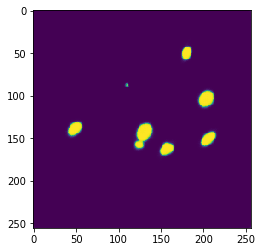

In [32]:
plt.imshow(predicted_masks[0])

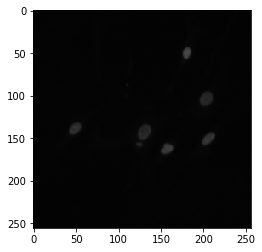

In [33]:
plt.imshow(test_images[0])

In [61]:
# Creating directoies for predicted masks and images
# Saving black and white masks
path_predicted_bw = "predicted_test_data_gray/"
if not os.path.exists(path_predicted_bw):
    os.makedirs(path_predicted_bw)

In [62]:
# Saving test images itself, and masks predicted for them
for i in range(len(test_ids)):
    temp_path = path_predicted_bw+test_ids[i]
    if not os.path.exists(temp_path):
        # Creating separate folder for each image-mask pair
        os.makedirs(temp_path)
        # Saving image
        image = Image.fromarray(test_images[i])
        image.save(temp_path+'/test_image.jpg')
        # Saving mask
        mask = Image.fromarray((predicted_masks[i]*255.9).astype(np.uint8))
        mask.save(temp_path+'/predicted_mask.jpg')
        


In [63]:
# Saving masks in viridis cmap
path_predicted_vr = "predicted_test_data_viridis/"
if not os.path.exists(path_predicted_vr):
    os.makedirs(path_predicted_vr)

In [64]:
# Saving test images itself, and masks predicted for them
for i in range(len(test_ids)):
    temp_path = path_predicted_vr+test_ids[i]
    if not os.path.exists(temp_path):
        # Creating separate folder for each image-mask pair
        os.makedirs(temp_path)
        # Saving image
        image = Image.fromarray(test_images[i])
        image.save(temp_path+'/test_image.jpg')
        # Saving mask
        plt.imsave(temp_path+'/predicted_mask.jpg', predicted_masks[i])
        
        


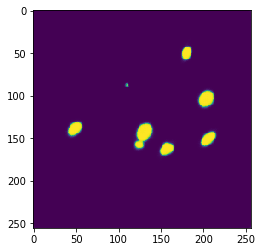

In [56]:
plt.imshow(predicted_masks[0], cmap="viridis")

In [58]:
plt.imsave("test.png", predicted_masks[0])